In [2]:
%store -r df

df.head()

,datetime,location,bsnApIfNoOfUsers,bsnAPIfDot11TransmittedFragmentCount,bsnAPIfDot11MulticastTransmittedFrameCount,bsnAPIfDot11RetryCount,bsnAPIfDot11MultipleRetryCount,bsnAPIfDot11FrameDuplicateCount,bsnAPIfDot11RTSSuccessCount,bsnAPIfDot11RTSFailureCount,...,bsnAPIfDot11MulticastReceivedFrameCount,bsnAPIfDot11FCSErrorCount,bsnAPIfDot11TransmittedFrameCount,bsnAPIfDot11WEPUndecryptableCount,bsnAPIfDot11FailedCount,bsnAPIfLoadRxUtilization,bsnAPIfLoadTxUtilization,bsnAPIfLoadChannelUtilization,bsnAPIfLoadNumOfClients,bsnAPIfPoorSNRClients
0,2015-09-01--00-00,AP-A10-5,0,244961,65868,25716,6012,2865,1522,3841,...,138672,20382445,38709845,0,145796,0,0,1,0,0
1,2015-09-01--00-00,AP-A10-2,0,665376,65942,92454,15264,5932,15981,37600,...,169214,79623550,39138541,27,446366,0,0,1,0,0
2,2015-09-01--00-00,Ustka-p1,1,13000039,27361,3605686,781238,389992,835178,1112931,...,9560,1375435,28583760,0,345982,0,0,0,1,0
3,2015-09-01--00-00,AP-C7-1cdf.0fac.9104,0,91592679,796916,29131516,5958158,2218986,5834107,8461871,...,681996,148962761,558515811,184,11010810,0,0,0,0,0
4,2015-09-01--00-00,AP-C7-1cdf.0fac.9144,0,864152,77579,423607,73483,29565,76782,226400,...,106018,23763109,45328364,116,390544,0,0,0,0,0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image

In [4]:
# data for testing, to not have to keep all data in ram memory
headData = {
    'datetime': ['2015-09-01--00-00', '2015-09-01--00-00', '2015-09-01--00-00', '2015-09-01--00-00', '2015-09-01--00-00'],
    'location': ['AP-A10-5', 'AP-A10-2', 'Ustka-p1', 'AP-C7-1cdf.0fac.9104', 'AP-C7-1cdf.0fac.9144'],
    'bsnApIfNoOfUsers': [0, 0, 1, 0, 0],
}

df = pd.DataFrame(data=headData)
df.head()

,datetime,location,bsnApIfNoOfUsers
0,2015-09-01--00-00,AP-A10-5,0
1,2015-09-01--00-00,AP-A10-2,0
2,2015-09-01--00-00,Ustka-p1,1
3,2015-09-01--00-00,AP-C7-1cdf.0fac.9104,0
4,2015-09-01--00-00,AP-C7-1cdf.0fac.9144,0


In [13]:
# get number of users 
df[(df.location == 'AP-A10-5') | (df.location == 'Ustka-p1')].sum()['bsnApIfNoOfUsers']

1

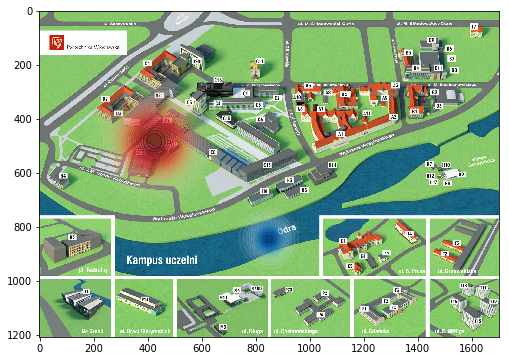

In [3]:
#2D Gaussian function
def twoD_Gaussian(x, y, xo, yo, sigma_x, sigma_y):
    a = 1./(2*sigma_x**2) + 1./(2*sigma_y**2)
    c = 1./(2*sigma_x**2) + 1./(2*sigma_y**2)
    g = np.exp( - (a*((x-xo)**2) + c*((y-yo)**2)))
    return g.ravel()


def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"
    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    
    return mycmap


#Use base cmap to create transparent
mycmap = transparent_cmap(plt.cm.Reds)
mycmap2 = transparent_cmap(plt.cm.Blues)


# Import image and get x and y extents
I = Image.open('./mapa_pwr.png')
p = np.asarray(I).astype('float')
w, h = I.size
y, x = np.mgrid[0:h, 0:w]

#Plot image and overlay colormap
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(9, 6)
ax.imshow(I)
Gauss = twoD_Gaussian(x, y, .25*x.max(), .4*y.max(), .1*x.max(), .1*y.max())
Gauss2 = twoD_Gaussian(x, y, .5*x.max(), .7*y.max(), .05*x.max(), .05*y.max())
ax.contourf(x, y, Gauss.reshape(x.shape[0], y.shape[1]), 25, cmap=mycmap)
ax.contourf(x, y, Gauss2.reshape(x.shape[0], y.shape[1]), 15, cmap=mycmap2)
#plt.colorbar(cb)
plt.show()